In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_34544_G')

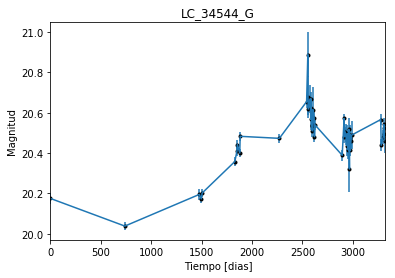

In [2]:
data = np.genfromtxt('LC_34544_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_34544_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

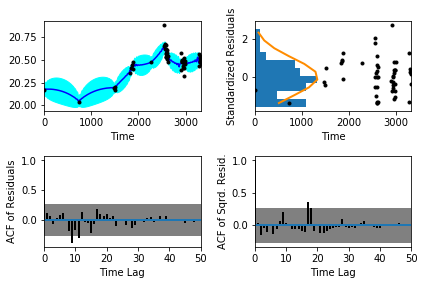

In [5]:
sample.assess_fit()

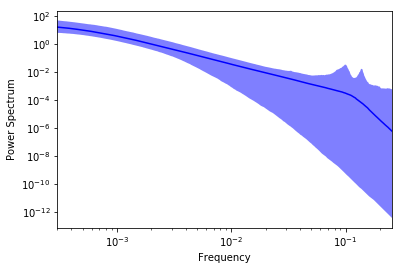

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_34544_G')

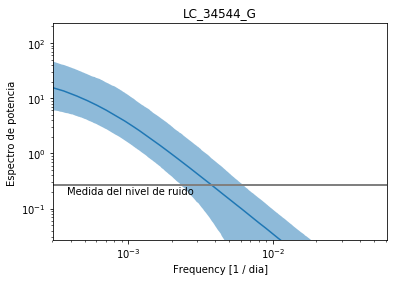

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_34544_G')

Text(0.5,1,'Prediccion , valor esperado LC_34544_G')

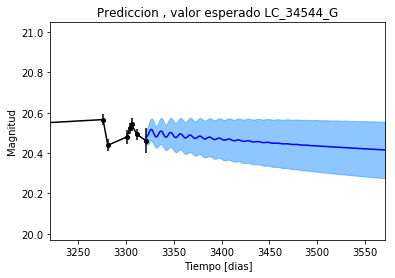

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_34544_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_34544_G')

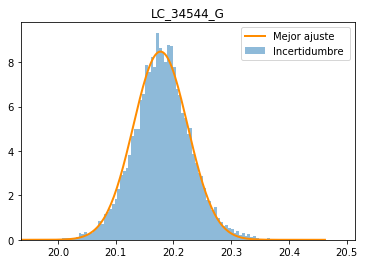

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_34544_G')

Text(0.5,1,'Interpolacion, camino simulado LC_34544_G')

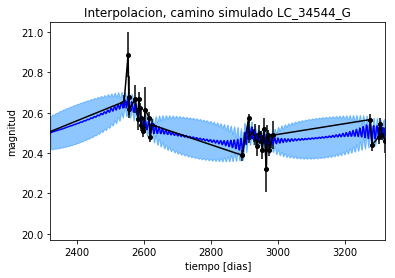

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_34544_G')

Text(0.5,1,'Interpolacion, camino simulado LC_34544_G')

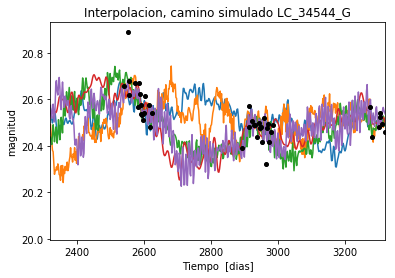

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_34544_G')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 714.307476505
Median: 0.00797383110378
Standard deviation: 0.0887524986783
68% credibility interval: [ 0.00172047  0.06358788]
95% credibility interval: [ 0.00043501  0.37428946]
99% credibility interval: [  3.26441510e-04   4.66868649e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 452.231994492
Median: 0.00576571721338
Standard deviation: 0.056077152305
68% credibility interval: [ 0.00101985  0.03406543]
95% credibility interval: [ 0.00035781  0.17834128]
99% credibility interval: [  3.14785359e-04   4.13305483e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 261.939030993
Median: 0.111493474119
Standard deviation:

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 429.757750148
Median: 86.4351794584
Standard deviation: 2.57550400933
68% credibility interval: [ 83.6667692   88.88061759]
95% credibility interval: [ 80.67073772  90.62258015]
99% credibility interval: [ 78.6598828   91.30833843]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 226.91360298
Median: 1.0064675234
Standard deviation: 1.30953240049
68% credibility interval: [ 0.24704109  2.70016239]
95% credibility interval: [ 0.03901704  4.82203977]
99% credibility interval: [ 0.01806597  6.41785428]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 345.837786646
Median: 0.792821487351
Standard deviation: 3.2392825226
68% credibility interval: [ 0.23513684  4.87667532]
95% credibility interval: [  0.01718201  10.36

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 18627.3691056
Median: 7.05629895967e-29
Standard deviation: 4.38030556565e+23
68% credibility interval: [  8.52304045e-80   2.17717000e-04]
95% credibility interval: [  1.05455506e-209   2.85920562e+000]
99% credibility interval: [  3.47872467e-246   9.05861863e+001]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1806.22401574
Median: 20.3288443478
Standard deviation: 0.0881377029152
68% credibility interval: [ 20.24814355  20.40785878]
95% credibility interval: [ 20.14617743  20.50205872]
99% credibility interval: [ 20.06840503  20.5742619 ]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 279.647535274
Median: 0.105459175233
Standard deviation: 0.13080137202
68% credibility interval: [ 0.02391967  0.30804974]
95% credibility interval: [ 0.          0.46463844]
99% credibility interval: [ 0.          0.49950295]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 279.647535274
Median: 0.105459175233
Standard deviation: 0.13080137202
68% credibility interval: [ 0.02391967  0.30804974]
95% credibility interval: [ 0.          0.46463844]
99% credibility interval: [ 0.          0.49950295]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1662.01421809
Median: 0.0
Standard deviation: 0.000165574088913
68% credib

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 429.757750148
Median: 86.4351794584
Standard deviation: 2.57550400933
68% credibility interval: [ 83.6667692   88.88061759]
95% credibility interval: [ 80.67073772  90.62258015]
99% credibility interval: [ 78.6598828   91.30833843]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1169.49674636
Median: 0.0318855377999
Standard deviation: 0.0228979741966
68% credibility interval: [ 0.02116591  0.05091415]
95% credibility interval: [ 0.01463228  0.08850859]
99% credibility interval: [ 0.01210762  0.1518219 ]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1236.83597125
Median: 1.13171105699
Standard deviation: 0.264014051363
68% credibility interval: [ 0.9021299   1.44491542]
95% credibility interval: [ 0.75290446  1.74291001]
99% credibility interval: [ 0.6719834   1.91783399]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 407.319581988
Median: 0.00459689142395
Standard deviation: 0.0566625234415
68% credibility interval: [ 0.00025212  0.03979291]
95% credibility interval: [  3.72060144e-06   1.97312672e-01]
99% credibility interval: [  4.80112475e-07   3.48874284e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 714.307476505
Median: (-0.0501010584332-0.657748631046j)
Standard deviation: 0.993180717413
68% credibility interval: [-0.39953446-1.22706031j -0.01081003-0.60699047j]
95% credibility interval: [-2.35173001-2.75307526j -0.00273324-0.11403716j]
99% credibility interval: [ -2.93342224e+00+0.j         -2.05109250e-03-1.5663702j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 452.231994492
Median: (-0.0362270696804+0.257515185463j)
Standard deviation: 0.894193431059
68% credibility interval: [-0.21403939+1.16486052j -0.00640793+0.36017903j]
95% credibility interval: [-1.12055134+2.00246148j -0.00224821+1.25297278j]
99% credibility interval: [ -2.59687494e+00+1.57414531j  -1.97785474e-03+0.j        ]
Posterior summary for 